<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/notebooks/Triangular_2d_lattice_BLBQ_Spin_1_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 566, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 566 (delta 43), reused 27 (delta 10), pack-reused 485
Receiving objects: 100% (566/566), 4.10 MiB | 14.18 MiB/s, done.
Resolving deltas: 100% (326/326), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su
import structure_matrix_generator as stmg
from tqdm.auto import tqdm


np.random.seed(216)

plt.rcParams.update({'font.size': 16, 
                     "figure.facecolor": 'white', 
                     "axes.facecolor": 'white', 
                     "savefig.facecolor": 'white', 
                     'savefig.edgecolor' : 'white', 
                     'figure.edgecolor' : 'white'})

# Spin-1 Simulation of a Bilinear-Biquadratic Heisenberg model on a triangular $2D$ lattice 

---



In [3]:
# The Tensor Network structure matrix
triangle_structure_matrix = stmg.infinite_structure_matrix_by_name('triangle')
print('The triangular 2D lattice structure matrix:')
print(triangle_structure_matrix)

The triangular 2D lattice structure matrix:
[[1 2 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 3 4 5 6 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 4 5 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 3 0 0 4 0 0 5 6 0 0 0]
 [0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 4 0 5 6 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 3 0 4 0 0 0 5 0 6]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 4 0 5 6]]


In [4]:
tri_tn = TensorNetwork(structure_matrix=triangle_structure_matrix, 
                       virtual_size=2, spin_dim=3)

In [5]:
# spin-1 operators
sx = np.array([[0., 1., 0.],
               [1., 0., 1.],
               [0., 1., 0.]]) / np.sqrt(2)
sy = np.array([[0., -1j, 0.],
               [1j, 0., -1j],
               [0., 1j, 0.]]) / np.sqrt(2)
sz = np.array([[1., 0., 0.],
               [0., 0., 0.],
               [0., 0., -1.]])

s_linear_term = [sx, sy, sz]
s_quad_term = [np.matmul(sx, sx), np.matmul(sy, sy), np.matmul(sz, sz),  
               np.matmul(sx, sy), np.matmul(sy, sx), np.matmul(sx, sz), 
               np.matmul(sz, sx), np.matmul(sz, sy), np.matmul(sy, sz)]

q0 = np.matmul(sx, sx) - np.matmul(sy, sy)
q1 = (2 * np.matmul(sz, sz) - np.matmul(sx, sx) - np.matmul(sy, sy)) / np.sqrt(3)
q2 = np.matmul(sx, sy) + np.matmul(sy, sx)
q3 = np.matmul(sy, sz) + np.matmul(sz, sy)
q4 = np.matmul(sz, sy) + np.matmul(sy, sz)
q_operator = [q0, q1, q2, q3, q4]

# get the spin-spin interaction terms
interaction_linear_term = np.zeros((np.power(sx.shape[0], 2), np.power(sx.shape[0], 2)), dtype=np.complex)
interaction_quad_term = np.zeros((np.power(sx.shape[0], 2), np.power(sx.shape[0], 2)), dtype=np.complex)
for s in s_linear_term:
    interaction_linear_term += np.kron(s, s)
for s in s_quad_term:
    interaction_quad_term += np.kron(s, s)    

The BLBQ Hamiltonian is given by

\begin{align}
    H = \cos{\left(\theta\right)}\sum_{<i, j>} \mathbf{S}_i\cdot \mathbf{S}_j + \sin{\left(\theta\right)}\sum_{<i, j>} \left(\mathbf{S}_i\cdot \mathbf{S}_j\right)^2
\end{align}

| D max:   1 | Theta: 0.000000 | Energy: -1.4997532373 | Magnetization: 0.9999847064 | quad: 0.4415845530 |
| D max:   1 | Theta: 0.063467 | Energy: -1.2003303512 | Magnetization: 0.9995748245 | quad: 0.4335150558 |
| D max:   1 | Theta: 0.126933 | Energy: -0.8977106874 | Magnetization: 0.9986207422 | quad: 0.4261995415 |
| D max:   1 | Theta: 0.190400 | Energy: -0.5931368859 | Magnetization: 0.9971229593 | quad: 0.4195920964 |
| D max:   1 | Theta: 0.253866 | Energy: -0.2878462796 | Magnetization: 0.9950633620 | quad: 0.4136536505 |
| D max:   1 | Theta: 0.317333 | Energy: 0.0169002093 | Magnetization: 0.9924041593 | quad: 0.4083687499 |
| D max:   1 | Theta: 0.380799 | Energy: 0.3198216767 | Magnetization: 0.9890855184 | quad: 0.4037495055 |
| D max:   1 | Theta: 0.444266 | Energy: 0.6196198831 | Magnetization: 0.9850213450 | quad: 0.3998448386 |
| D max:   1 | Theta: 0.507732 | Energy: 0.9149806736 | Magnetization: 0.9800926099 | quad: 0.3967603361 |
| D max:   1 | Theta: 0.571199 |

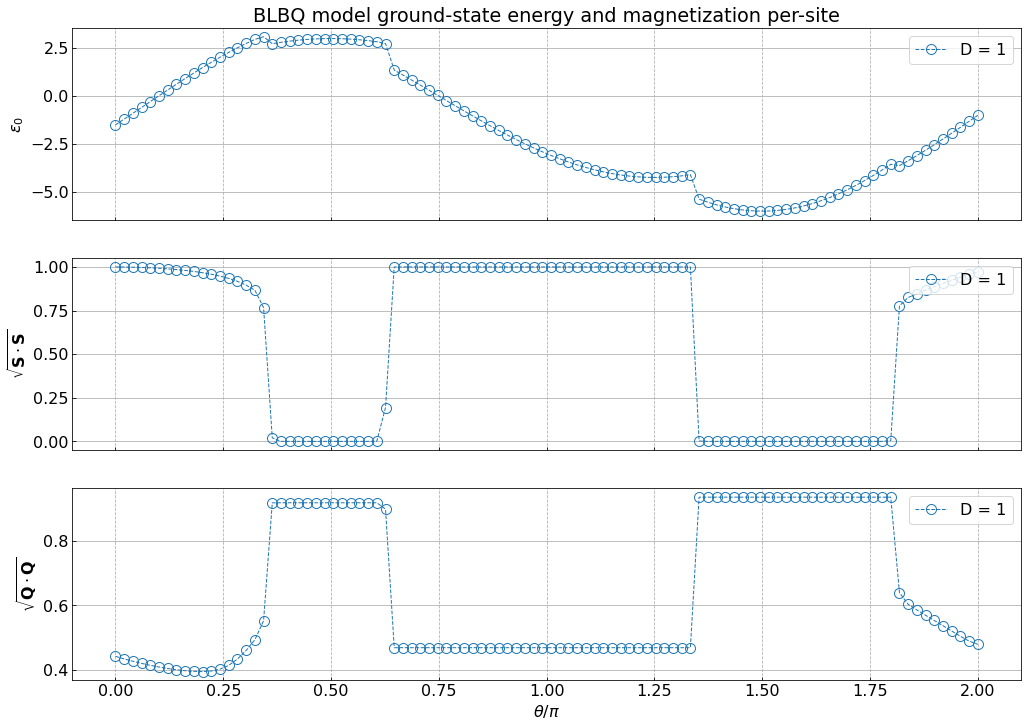

| D max:   2 | Theta: 0.000000 | Energy: -3.0000000000 | Magnetization: 0.0000000001 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.063467 | Energy: -2.6134165115 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.126933 | Energy: -2.2163097170 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.190400 | Energy: -1.8102786256 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.253866 | Energy: -1.3969581811 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.317333 | Energy: -0.9780126790 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.380799 | Energy: -0.5551290651 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.444266 | Energy: -0.1300101423 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.507732 | Energy: 0.2956322854 | Magnetization: 0.0000000000 | quad: 0.5773502692 |
| D max:   2 | Theta: 0.57119

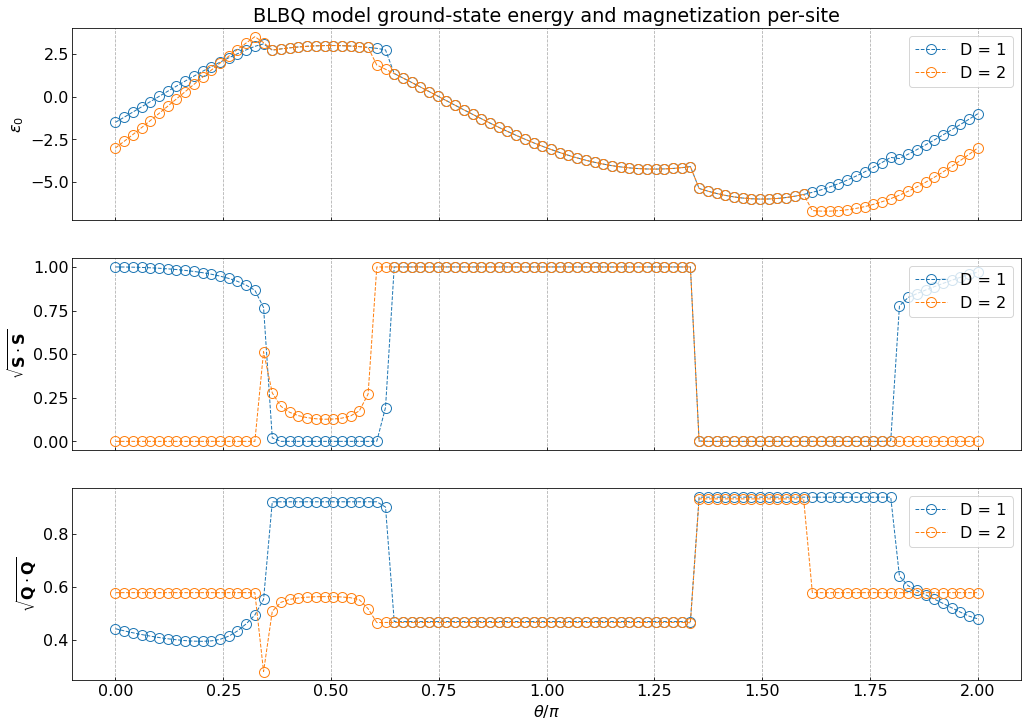

In [6]:
# Simple-Update parameters
d_max_tri = [1, 2]
error = 1e-6
max_iterations = 200
tri_energy = {}
tri_magnetization = {}
tri_quad = {}

j_ij = [-1.] * len(tri_tn.weights)
dts = [0.1, 0.01, 0.001, 0.0001]

# set angle values in [0, 2pi]
theta = np.linspace(0, 2 * np.pi, 100)
partial_d_max = []

# Run
for d_max in d_max_tri:
    partial_d_max.append(d_max)
    tri_energy[d_max] = []
    tri_magnetization[d_max] = []
    tri_quad[d_max] = []
    for i, angle in enumerate(tqdm(theta)):
        hamiltonian = np.cos(angle) * interaction_linear_term + np.sin(angle) * interaction_quad_term
        #tri_tn = TensorNetwork(structure_matrix=triangle_structure_matrix, 
        #                       virtual_size=2, spin_dim=3)
        tri_su = su.SimpleUpdate(tensor_network=tri_tn, 
                                  dts=dts, 
                                  j_ij=[], 
                                  h_k=0, 
                                  s_i=s_linear_term, 
                                  s_j=s_linear_term, 
                                  s_k=[], 
                                  d_max=d_max, 
                                  max_iterations=max_iterations, 
                                  convergence_error=error, 
                                  log_energy=False,
                                  print_process=False,
                                  hamiltonian=hamiltonian)
        tri_su.run()
        energy = tri_su.energy_per_site()
        magnetization = 0
        quad = 0
        for ten, _ in enumerate(tri_tn.tensors):
            magn_x = np.power(np.real(tri_su.tensor_expectation(ten, sx)), 2)
            magn_y = np.power(np.real(tri_su.tensor_expectation(ten, sy)), 2)
            magn_z = np.power(np.real(tri_su.tensor_expectation(ten, sz)), 2)
            magnetization += np.sqrt(magn_x + magn_y + magn_z)

            local_q = []
            for q in q_operator:
                local_q.append(np.power(np.real(tri_su.tensor_expectation(ten, q)), 2))
            quad += np.sqrt(np.sum(np.array(local_q)))

        
        magnetization /= len(tri_tn.tensors)
        quad /= len(tri_tn.tensors)
        print('| D max: {:3d} | Theta: {:2.6f} | Energy: {:3.10f} | Magnetization: {:3.10f} | quad: {:3.10f} |'
        .format(d_max, angle, energy, magnetization, quad))
        tri_energy[d_max].append(energy)
        tri_magnetization[d_max].append(magnetization)
        tri_quad[d_max].append(quad)

    fig, ax = plt.subplots(3, 1, figsize=(17, 12))
    for pd_max in partial_d_max:
        ax[0].plot(theta / np.pi, tri_energy[pd_max], '--o', label=f'D = {pd_max}', 
                  markerfacecolor='none', linewidth=1, markersize=10)
        ax[0].set_xlabel('')
        ax[0].set_xticklabels([])
        ax[0].set_ylabel(r'$\epsilon_0$')
        ax[0].set_title('BLBQ model ground-state energy and magnetization per-site')
        ax[0].tick_params(direction='in', axis='both')
        ax[0].grid()
        ax[0].legend(loc='upper right')
        ax[0].grid(which='major', axis='x', linestyle='--')


        ax[1].plot(theta / np.pi, tri_magnetization[pd_max], '--o', label=f'D = {pd_max}', 
                  markerfacecolor='none', linewidth=1, markersize=10)
        ax[1].set_ylabel(r'$\sqrt{\mathbf{S}\cdot\mathbf{S}}$')
        ax[1].set_xlabel('')
        ax[1].set_xticklabels([])
        ax[1].tick_params(direction='in', axis='both')
        ax[1].grid()
        ax[1].legend(loc='upper right')
        ax[1].grid(which='major', axis='x', linestyle='--')


        ax[2].plot(theta / np.pi, tri_quad[pd_max], '--o', label=f'D = {pd_max}', 
                  markerfacecolor='none', linewidth=1, markersize=10)
        ax[2].set_xlabel(r'$\theta / \pi$')
        ax[2].set_ylabel(r'$\sqrt{\mathbf{Q}\cdot\mathbf{Q}}$')
        ax[2].tick_params(direction='in', axis='both')
        ax[2].grid()
        ax[2].legend(loc='upper right')
        ax[2].grid(which='major', axis='x', linestyle='--')
    plt.show()
    

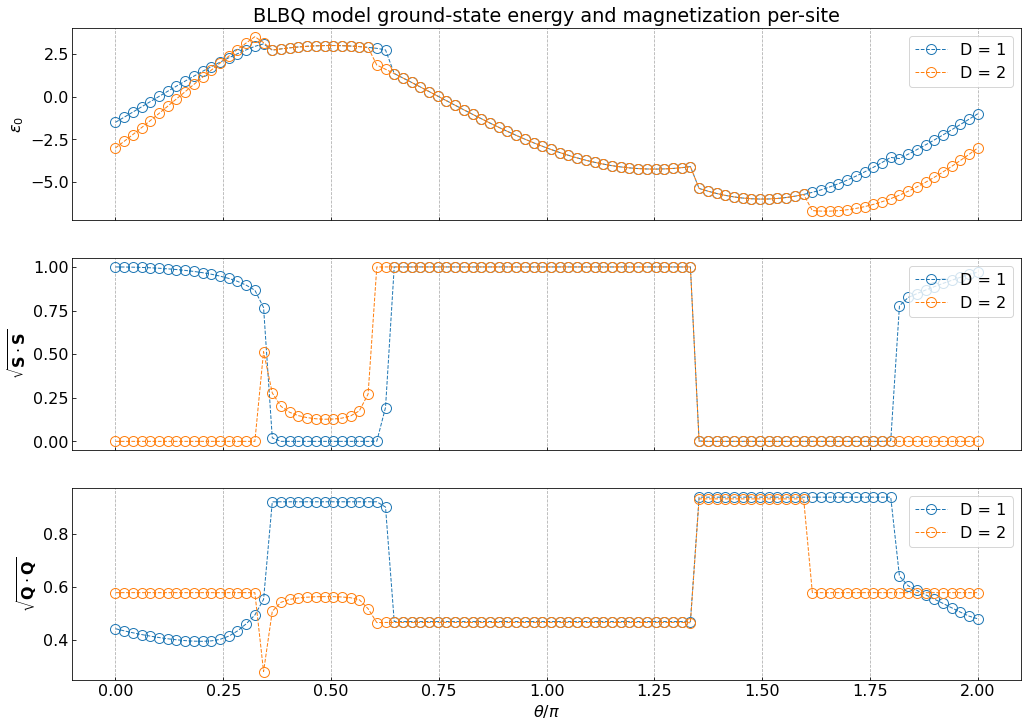

In [7]:
# color='tab:red'

fig, ax = plt.subplots(3, 1, figsize=(17, 12))
for d_max in d_max_tri:
    ax[0].plot(theta / np.pi, tri_energy[d_max], '--o', label=f'D = {d_max}', 
              markerfacecolor='none', linewidth=1, markersize=10)
    ax[0].set_xlabel('')
    ax[0].set_xticklabels([])
    ax[0].set_ylabel(r'$\epsilon_0$')
    ax[0].set_title('BLBQ model ground-state energy and magnetization per-site')
    ax[0].tick_params(direction='in', axis='both')
    ax[0].grid()
    ax[0].legend(loc='upper right')
    ax[0].grid(which='major', axis='x', linestyle='--')


    ax[1].plot(theta / np.pi, tri_magnetization[d_max], '--o', label=f'D = {d_max}', 
               markerfacecolor='none', linewidth=1, markersize=10)
    ax[1].set_ylabel(r'$\sqrt{\mathbf{S}\cdot\mathbf{S}}$')
    ax[1].set_xlabel('')
    ax[1].set_xticklabels([])
    ax[1].tick_params(direction='in', axis='both')
    ax[1].grid()
    ax[1].legend(loc='upper right')
    ax[1].grid(which='major', axis='x', linestyle='--')


    ax[2].plot(theta / np.pi, tri_quad[d_max], '--o', label=f'D = {d_max}', 
               markerfacecolor='none', linewidth=1, markersize=10)
    ax[2].set_xlabel(r'$\theta / \pi$')
    ax[2].set_ylabel(r'$\sqrt{\mathbf{Q}\cdot\mathbf{Q}}$')
    ax[2].tick_params(direction='in', axis='both')
    ax[2].grid()
    ax[2].legend(loc='upper right')
    ax[2].grid(which='major', axis='x', linestyle='--')
